In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
air_quality_data = pd.read_csv('city_day.csv')
# https://www.kaggle.com/datasets/anjusunilkumar/air-quality-prediction

In [3]:
air_quality_data.shape

(29531, 16)

In [4]:
air_quality_data.head

<bound method NDFrame.head of                 City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benz

In [5]:
air_quality_data.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
new_data = air_quality_data.dropna(subset=['AQI_Bucket'])
new_data.shape

(24850, 16)

In [7]:
new_data['AQI_Bucket'].value_counts()
'''
Moderate        100-200
Satisfactory    50-100
Poor            200-300
Very Poor       300-500
Good            0-50
Severe          >500
'''

'\nModerate        100-200\nSatisfactory    50-100\nPoor            200-300\nVery Poor       300-500\nGood            0-50\nSevere          >500\n'

In [8]:
air_quality_data.head

<bound method NDFrame.head of                 City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benz

In [9]:
corr_matrix = new_data.corr()
print(corr_matrix.iloc[-1:])

        PM2.5      PM10        NO       NO2      NOx       NH3        CO  \
AQI  0.659181  0.803313  0.452191  0.537071  0.48645  0.252019  0.683346   

          SO2        O3   Benzene   Toluene    Xylene  AQI  
AQI  0.490586  0.198991  0.044407  0.279992  0.165532  1.0  


In [10]:
not_xylene_data = air_quality_data.drop(columns=['Xylene'])

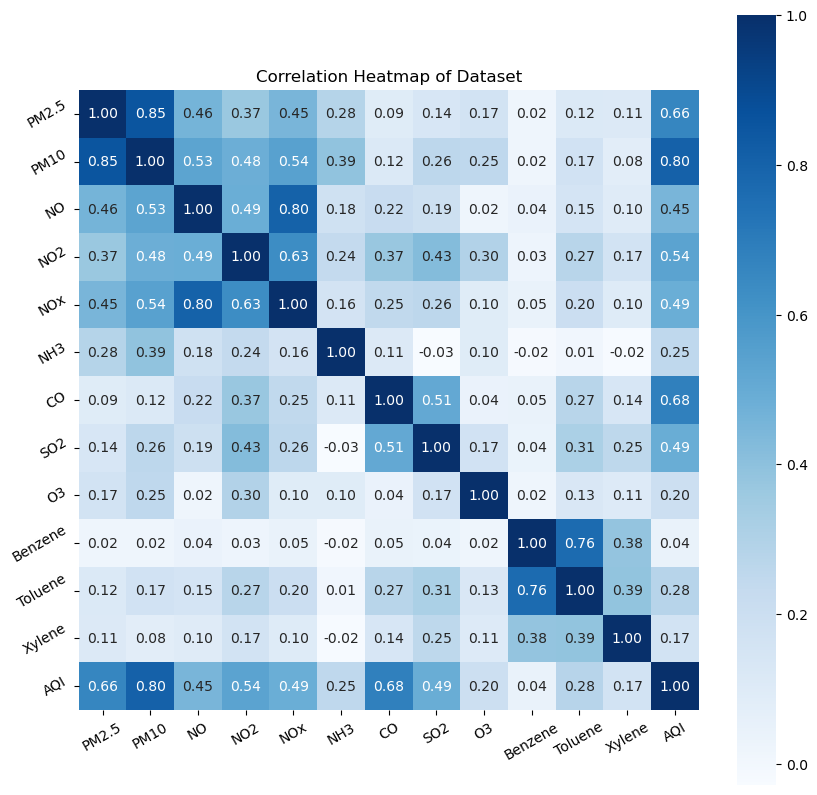

In [11]:
plt.figure(figsize=(10, 10))
plt.title('Correlation Heatmap of Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f',cmap="Blues")
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()   

In [12]:
new_data = air_quality_data.drop(columns=['Xylene']).dropna()
new_data.shape

(10654, 15)

        PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
AQI  0.912642  0.917273  0.688746  0.674695  0.663679  0.521388  0.437458   

          SO2        O3   Benzene   Toluene  AQI  
AQI  0.390766  0.404886  0.024205  0.184328  1.0  


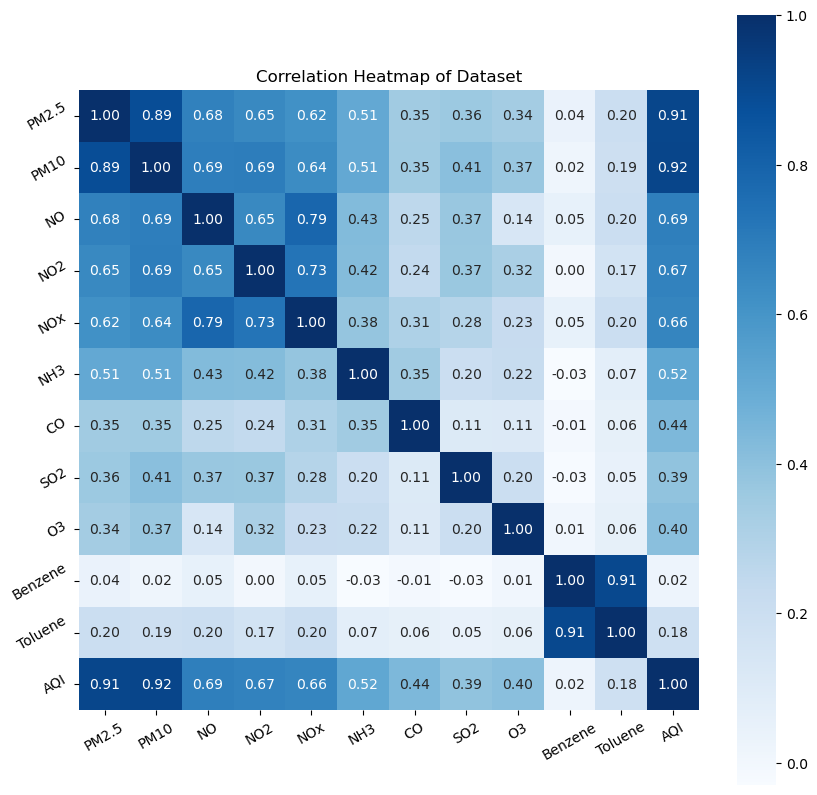

In [13]:
corr_matrix = new_data.corr()
print(corr_matrix.iloc[-1:])
plt.figure(figsize=(10, 10))
plt.title('Correlation Heatmap of Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f',cmap="Blues")
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()   

In [14]:
new_data['AQI_Bucket'].value_counts()

Moderate        3980
Satisfactory    3901
Poor            1048
Good             753
Very Poor        707
Severe           265
Name: AQI_Bucket, dtype: int64

from sklearn import tree


In [15]:
x =new_data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene']]
#---label---
Y = new_data['AQI']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2,
 random_state=5)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, Y_train)
pred = model.predict(x_test)

R-Squared: 0.90677323
Mse:  839.217279546382


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

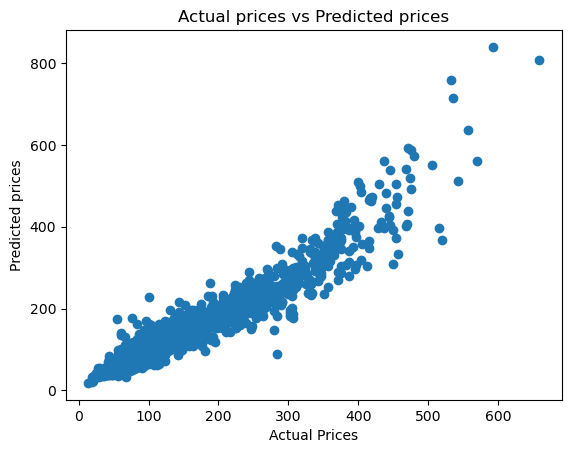

In [20]:
print('R-Squared: %.8f' % model.score(x_test,Y_test))
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)
print('Mse: ', mse)
plt.scatter(Y_test, pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")